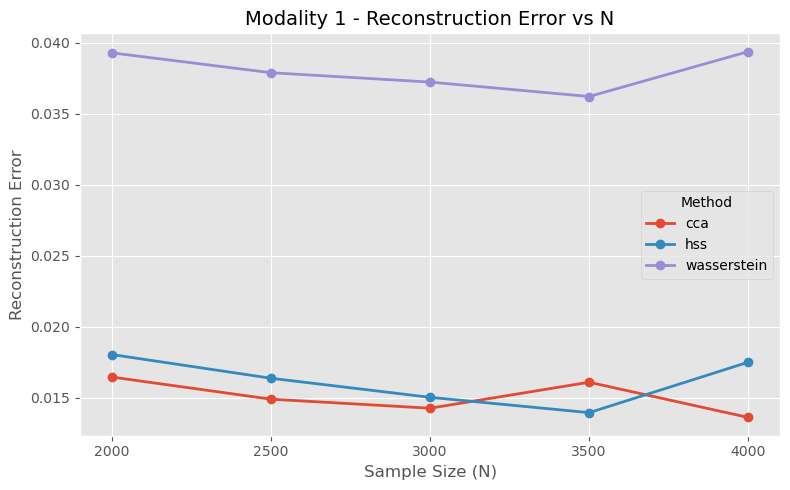

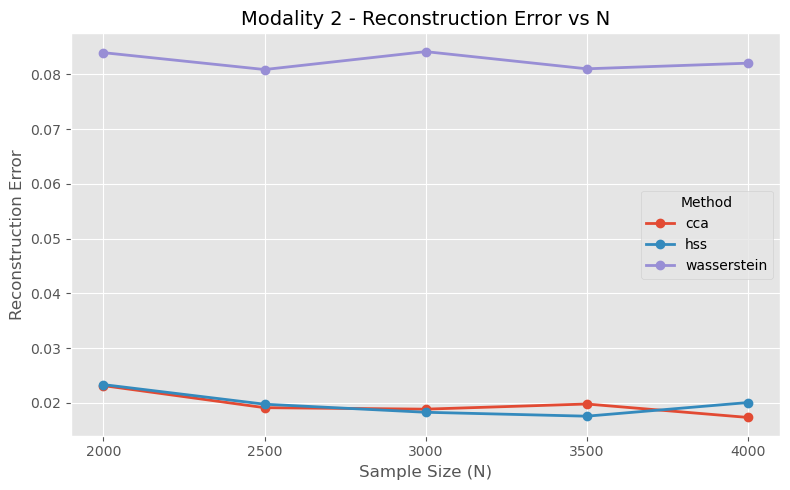

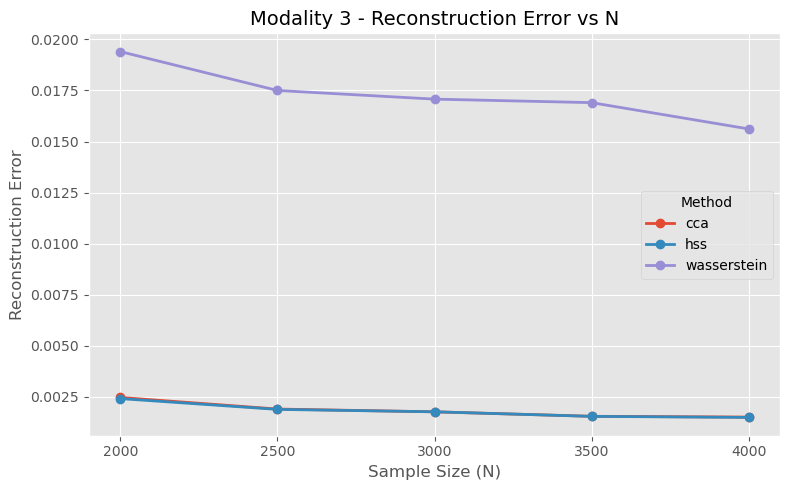

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the combined results
df = pd.read_csv("/home/sagnik/Research/Hierarchical_AMP/Results/vary_meth/combined_for_ggplot.csv")

# Use ggplot-style aesthetics
plt.style.use("ggplot")

# Ensure the output directory exists
output_dir = "/home/sagnik/Research/Hierarchical_AMP/Plots/vary_meth"
os.makedirs(output_dir, exist_ok=True)

# Plot for each modality
for modality in sorted(df["Modality"].unique()):
    plt.figure(figsize=(8, 5))
    subset = df[df["Modality"] == modality]

    for method in sorted(subset["Method"].unique()):
        method_data = subset[subset["Method"] == method].sort_values("N")
        plt.plot(
            method_data["N"],
            method_data["Error"],
            marker='o',
            label=method,
            linewidth=2
        )

    plt.title(f"Modality {modality} - Reconstruction Error vs N", fontsize=14)
    plt.xlabel("Sample Size (N)", fontsize=12)
    plt.ylabel("Reconstruction Error", fontsize=12)
    plt.xticks(sorted(df["N"].unique()))
    plt.legend(title="Method")
    plt.tight_layout()

    # Save and show
    plot_path = os.path.join(output_dir, f"modality_{modality}_error_vs_n.png")
    plt.savefig(plot_path, dpi=150)
    plt.show()